## Chi-Square Test

This test is applied when you have 2 categorical features/variables from a single population.
It is used to determine whether there is any significant association b/w 2 feature.

https://www.youtube.com/watch?v=w5iKu1IrTJQ&list=PLE6KYAK0e5K0QfvPQ_SoMwjfKv-V1uaPt&index=4

In [75]:
import scipy.stats as stats

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Task is to determine whether any association exist b/w smoker and sex feature.

Smoker, Sex -> Catgorical Feature

In [78]:
# Step 1: Pick the 2 categorical features 
# Step 2: Apply crosstab()

In [79]:
df[['smoker', 'sex']]

,smoker,sex
0,No,Female
1,No,Male
2,No,Male
3,No,Male
4,No,Female
...,...,...
239,No,Male
240,Yes,Female
241,Yes,Male
242,No,Male


**pd.crosstab()**

Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [80]:
df_freq_table = pd.crosstab(df['sex'], df['smoker'])
df_freq_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


Means we got a frequency table of two feature smoker and sex.

sex is the index, smoker is the columns.

60 Male does smoking, 97 Male don't smoke.

33 Female does smoking, 54 Female don't smoke.

In [81]:
# Step 3: Show observed values 

In [82]:
observed_values = df_freq_table.values
print("Observed values: \n", observed_values)
print(type(observed_values))

Observed values: 
 [[60 97]
 [33 54]]
<class 'numpy.ndarray'>


In [83]:
# Step 4: Apply chi2-contingency method to our frequency table

# This function computes the chi-square statistic and p-value for the
# hypothesis test of independence of the observed frequencies.

In [84]:
vals = stats.chi2_contingency(df_freq_table)
vals

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

 0.925417020494423 - **P Value**
 
 This 2D array is our **Expected values:**
 
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))
        
 This 2D array is our **Observed values:** 
 
 [[60 97]
 [33 54]]
 
 These two expected and observed values have small difference. Based on this difference, we need to
 check both are associated or not.

In [85]:
# Step 5: Store the expected values

In [86]:
values = stats.chi2_contingency(df_freq_table)
expected_vals = values[3]
expected_vals

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [87]:
# Step 6: find no of rows and columns in our frequency table

In [88]:
df_freq_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [89]:
df_freq_table.shape

(2, 2)

In [90]:
no_of_rows = df_freq_table.shape[0]
no_of_cols = df_freq_table.shape[1]
print('Rows:', no_of_rows)
print('Columns:', no_of_cols)

Rows: 2
Columns: 2


In [91]:
# Step 6: Compute Degree of Freeedom.

**Formula:**
    
dof=(rows-1)*(columns-1)

In [92]:
dof = (no_of_rows-1)*(no_of_cols-1)
print('Degree of Freedom:', dof)

Degree of Freedom: 1


In [93]:
# Step 7: Set alpha to 0.05.

In [94]:
alpha = 0.05

In [95]:
# alpha values means how much variance we have to capture.
# if alpha is 0.05, it means 95% of variance we should capture b/w two features.

# 0.05 -> 5%
# 0.95 -> 95%

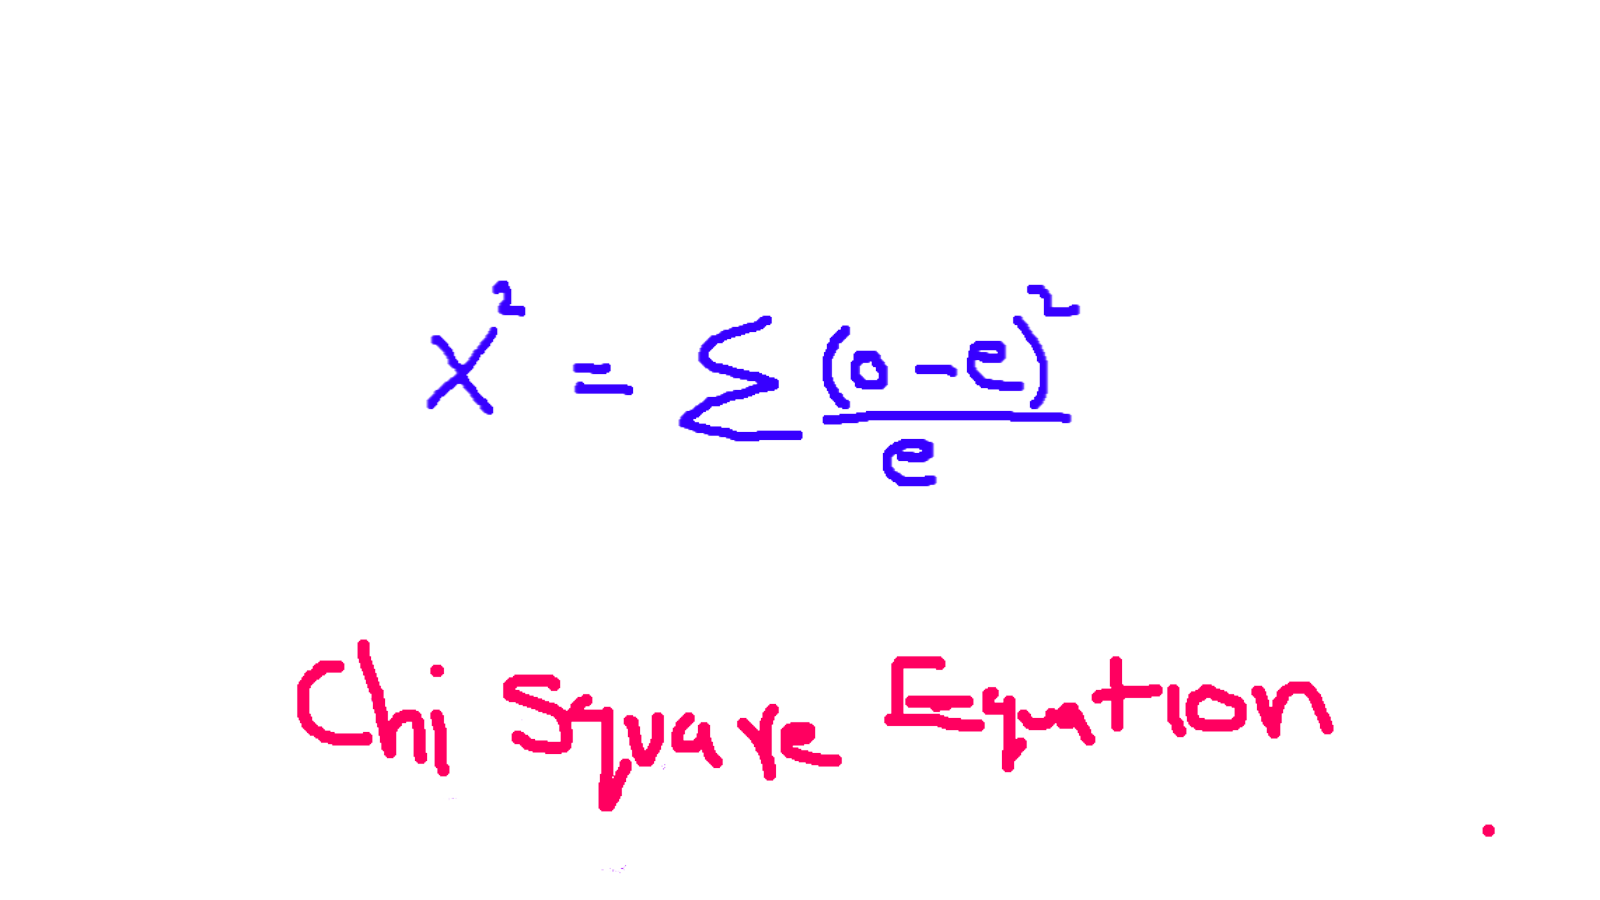

 o - Observed Values
 
 e - Expected Values

In [96]:
# Step 8: Compute the chi-square equation in python

In [97]:
from scipy.stats import chi2

In [98]:
vals = zip(observed_values, expected_vals)
print(list(vals))

[(array([60, 97], dtype=int64), array([59.84016393, 97.15983607])), (array([33, 54], dtype=int64), array([33.15983607, 53.84016393]))]


In [99]:
observed_values

array([[60, 97],
       [33, 54]], dtype=int64)

In [100]:
expected_vals

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [101]:
# Apply the formula
chi_square = sum((o-e)**2/e for o, e in zip(observed_values, expected_vals))
chi_square

array([0.00119737, 0.00073745])

In [102]:
# Step 9: Compute Chi Square statistic 

In [103]:
chi_square_statistic = sum(chi_square)
print("chi-square statistic:", chi_square_statistic)

chi-square statistic: 0.001934818536627623


In [104]:
# Step 10: Find critical value

In [110]:
# Pass 1-alpha and degree of freedom as arguments to ppf()
critical_value = chi2.ppf(q=1-alpha, df=dof)
critical_value

3.841458820694124

In [ ]:
# Step 11: Find P Value

In [122]:
# Pass chi_square_statistic and degree of freedom as arguments to cdf()
# Subtract the result from 1 to get p value.

p_value = 1-chi2.cdf(x=chi_square_statistic, df=dof)
p_value

0.964915107315732

In [124]:
# Step 12: Print all important statistics

In [128]:
print(f'P Value: {p_value}')
print(f'Significance Level(Alpha): {alpha}')
print(f'Degree of Freedom: {dof}')
print(f'Chi Square Statistic: {chi_square_statistic}')
print(f'Critical Value: {critical_value}')

P Value: 0.964915107315732
Significance Level(Alpha): 0.05
Degree of Freedom: 1
Chi Square Statistic: 0.001934818536627623
Critical Value: 3.841458820694124


In [125]:
# Step 13: Check Whether any relationship exist b/w Smoker and Sex features

- Null hypothesis (H0) - No relation b/w 2 categorical features.
- Alternate Hypothesis (H1) - Relation exist b/w 2 categorical features.

In [129]:
if chi_square_statistic >= critical_value:
    print('Reject H0, There is a relationship b/w Smoker and Sex feature')
else:
    print('Accept H0, There is no relatioship b/w Smoker and Sex feature')

if p_value <= alpha:
    print('Reject H0, There is a relationship b/w Smoker and Sex feature')
else:
    print('Accept H0, There is no relatioship b/w Smoker and Sex feature')

Accept H0, There is no relatioship b/w Smoker and Sex feature
Accept H0, There is no relatioship b/w Smoker and Sex feature


**Conclusion:**

We can infer that both feature **smoker** & **sex** are not associated/related with each other.

We can also say, this 2 features are **independent** since no relationship there.

Chi-Square also helps in feature selection.